In [9]:
import pandas as pd

data_baru = {
    'pendapatan': [50000, 75000, 30000, 120000, 45000, 55000, 90000, 32000, 70000], 
    'jumlah_anak': [2, 1, 0, 3, 2, 2, 1, 0, 2],  
    'status_pernikahan': ['menikah', 'menikah', 'single', 'menikah', 'single', 'single', 'menikah', 'single', 'menikah']  
}
sensus_df_baru = pd.DataFrame(data_baru)

sensus_df_baru


,pendapatan,jumlah_anak,status_pernikahan
0,50000,2,menikah
1,75000,1,menikah
2,30000,0,single
3,120000,3,menikah
4,45000,2,single
5,55000,2,single
6,90000,1,menikah
7,32000,0,single
8,70000,2,menikah


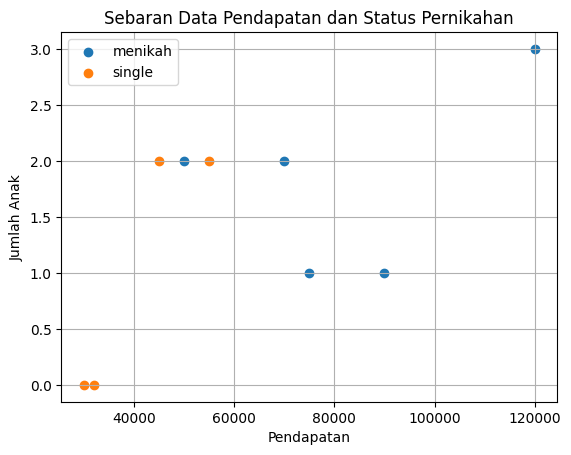

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Mengelompokkan data berdasarkan kolom 'status_pernikahan' dan membuat scatter plot
for status_pernikahan, d in sensus_df_baru.groupby('status_pernikahan'):
    ax.scatter(d['pendapatan'], d['jumlah_anak'], label=status_pernikahan)

plt.legend(loc='upper left')
plt.title('Sebaran Data Pendapatan dan Status Pernikahan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Anak')
plt.grid(True)
plt.show()

In [11]:
import numpy as np

X_train = np.array(sensus_df_baru[['pendapatan', 'jumlah_anak']])
y_train = np.array(sensus_df_baru['status_pernikahan'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 50000      2]
 [ 75000      1]
 [ 30000      0]
 [120000      3]
 [ 45000      2]
 [ 55000      2]
 [ 90000      1]
 [ 32000      0]
 [ 70000      2]]

y_train: ['menikah' 'menikah' 'single' 'menikah' 'single' 'single' 'menikah'
 'single' 'menikah']


In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]


In [13]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 1 0 1 1 0 1 0]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
pendapatan = 50000
jumlah_anak = 2
X_new = np.array([pendapatan, jumlah_anak]).reshape(1, -1)
X_new


array([[50000,     2]])

In [22]:
y_new = model.predict(X_new)



In [23]:
lb.inverse_transform(y_new)

array(['single'], dtype='<U7')

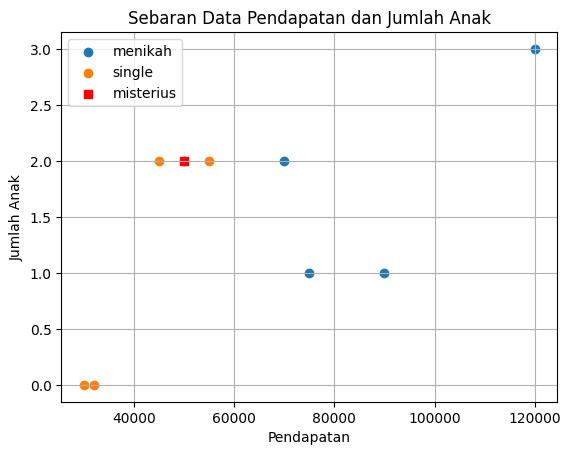

In [26]:
fig, ax = plt.subplots()
for status_pernikahan, d in sensus_df_baru.groupby('status_pernikahan'):
    ax.scatter(d['pendapatan'], d['jumlah_anak'], label=status_pernikahan)

plt.scatter(pendapatan,
            jumlah_anak,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Pendapatan dan Jumlah Anak')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Anak')
plt.grid(True)
plt.show()


In [28]:
misteri = np.array([pendapatan, jumlah_anak])
misteri


array([50000,     2])

In [29]:
X_train

array([[ 50000,      2],
       [ 75000,      1],
       [ 30000,      0],
       [120000,      3],
       [ 45000,      2],
       [ 55000,      2],
       [ 90000,      1],
       [ 32000,      0],
       [ 70000,      2]], dtype=int64)

In [30]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak


[49845.04638376817,
 74845.03180572508,
 29845.082090689582,
 119845.018728356,
 44845.05155532771,
 54845.04215514835,
 89845.02649562746,
 31845.07693506172,
 69845.03310186058]

In [31]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,usia,jumlah_saudara_kandung,pekerjaan,jarak
2,22,3,pelajar,29845.082091
7,23,4,pelajar,31845.076935
4,28,0,pelajar,44845.051555
0,25,2,karyawan,49845.046384
5,27,1,pelajar,54845.042155
8,33,1,karyawan,69845.033102
1,30,1,manajer,74845.031806
6,40,2,manajer,89845.026496
3,35,2,karyawan,119845.018728


In [33]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = np.array([0, 0, 1, 1])  # 0 untuk status pernikahan "menikah", 1 untuk status pernikahan "single"

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')


X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]



In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


In [36]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.5


In [37]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [38]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [43]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classfication Report:\n{cls_report}')

Classfication Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.

In [44]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.5


In [45]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
